## Проект e-learning

In [66]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import scipy.stats as ss
from urllib.parse import urlencode 
import matplotlib.pyplot as plt

In [2]:
# Загрузка файла assessments.csv
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/iSVP1sZ7AdW7TQ' 
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
# загружаем файл в df 
download_response = requests.get(download_url) 
assessments = pd.read_csv(download_url, sep=',') 

**Assessments**
Cодержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).

*code_module* — идентификационный код предмета.

*code_presentation* — семестр (Идентификационный код).

*id_assessment* — тест (Идентификационный номер ассессмента).

*assessment_type* — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).

*date* — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).

*weight* — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

In [3]:
# Загрузка файла courses.csv
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/jmJxR8yhwCXlaw' 
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
# загружаем файл в df 
download_response = requests.get(download_url) 
courses = pd.read_csv(download_url, sep=',') 

**Courses**
Список предметов по семестрам.

*code_module* — предмет (идентификационный код).

*code_presentation* — семестр (идентификационный код).

*module_presentation_length* — продолжительность семестра в днях.

In [4]:
# Загрузка файла studentAssessment.csv
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/DYd4M5b_8RETsA' 
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
# загружаем файл в df 
download_response = requests.get(download_url) 
st_assessment = pd.read_csv(download_url, sep=',') 

**st_assessment**
Результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.

*id_assessment* — тест (идентификационный номер).

*id_student* — идентификационный номер студента.

*date_submitted* — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.

*is_banked* — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).

*score* — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

In [5]:
# Загрузка файла studentRegistration.csv
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/lqHnH8NOZ458iw' 
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
# загружаем файл в df 
download_response = requests.get(download_url) 
registration = pd.read_csv(download_url, sep=',') 

In [6]:
registration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


**registration**
Информация о времени, когда студент зарегистрировался для прохождения курса в семестре.

*code_module* — предмет (идентификационный код).

*code_presentation* — семестр (идентификационный код)

*id_student* — идентификационный номер студента.

*date_registration* — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).

*date_unregistration* — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

In [7]:
#соединим таблицы courses и assessments. Колонки - code_module, code_presentation
courses_and_assess= pd.merge(assessments, courses, how='left', on=['code_module','code_presentation'])

In [8]:
courses_and_assess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 205
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 206 non-null    object 
 1   code_presentation           206 non-null    object 
 2   id_assessment               206 non-null    int64  
 3   assessment_type             206 non-null    object 
 4   date                        195 non-null    float64
 5   weight                      206 non-null    float64
 6   module_presentation_length  206 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 12.9+ KB


In [9]:
#Соединим таблицы courses_and_assess и st_assessment по id_assessment  
stud_courses_info= pd.merge(st_assessment, courses_and_assess, how='left', on=['id_assessment'])

In [10]:
stud_courses_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173912 entries, 0 to 173911
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id_assessment               173912 non-null  int64  
 1   id_student                  173912 non-null  int64  
 2   date_submitted              173912 non-null  int64  
 3   is_banked                   173912 non-null  int64  
 4   score                       173739 non-null  float64
 5   code_module                 173912 non-null  object 
 6   code_presentation           173912 non-null  object 
 7   assessment_type             173912 non-null  object 
 8   date                        171047 non-null  float64
 9   weight                      173912 non-null  float64
 10  module_presentation_length  173912 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 15.9+ MB


In [11]:
#Посмотрим, что делать с пропущенными score. Проверим, есть ли пропущенные для экзаменов, поскольку ниже будем работать с ними
stud_courses_info[(stud_courses_info['assessment_type'] == 'Exam') & (stud_courses_info['score'].isnull())]
#Пропущенных score для экзаменов нет, поэтому заменять их не будем

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length


**Вопрос 1** Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене).

Для решения задачи проведи предварительное исследование данных и сформулируй, что должно считаться курсом. Обосновать свой выбор ты можешь с помощью фактов сдачи экзаменов, распределения студентов и уникального идентификатора курса.

*Предположим, что курсом будем считать уникальную комбинацию предмета (code_module) и семестра (code_presentation), для которого итоговый контроль осуществлялся при помощи экзамена (assessment_type == 'Exam'), поскольку указано, что успешная сдача - зачет по курсу на экзамене.
Т.к. для каждого уникального предмета могло быть несколько экзаменов в разные семестры (code_presentation), проверим, были ли студенты, которые сдавали экзамен по одному и тому же предмету в разные семестры

In [12]:
#Для проверки этого утверждения проверим, сколько уникальных code_presentation встречается для каждой комбинации студента, сдавшего экзамен более чем на 40 баллов, и code_module
unique_comb = stud_courses_info.query("score >= 40 & assessment_type == 'Exam'")\
.groupby(['id_student', 'code_module'], as_index = False)\
.code_presentation.nunique()
unique_comb.query("code_presentation > 1")

,id_student,code_module,code_presentation
1341,540758,DDD,2
2232,593903,DDD,2
2479,605118,DDD,2


Таких студентов 3. Посмотрим на них внимательнее

In [13]:
stud_courses_info.query("(id_student == 540758 | id_student == 593903 | id_student == 605118) & (assessment_type == 'Exam')")\
.head(10).sort_values('id_student')

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length
69983,25340,540758,229,0,40.0,DDD,2013B,Exam,240.0,100.0,240
87573,25361,540758,234,0,60.0,DDD,2014B,Exam,241.0,100.0,241
82731,25354,593903,241,0,49.0,DDD,2013J,Exam,261.0,100.0,261
95711,25368,593903,243,0,44.0,DDD,2014J,Exam,NaN,100.0,262
82844,25354,605118,237,0,42.0,DDD,2013J,Exam,261.0,100.0,261
95749,25368,605118,243,0,64.0,DDD,2014J,Exam,NaN,100.0,262


In [14]:
registration.query('id_student == 540758 | id_student == 593903 | id_student == 605118').head(50).sort_values('id_student')

,code_module,code_presentation,id_student,date_registration,date_unregistration
13857,DDD,2013B,540758,-74.0,NaN
16693,DDD,2014B,540758,-25.0,NaN
15768,DDD,2013J,593903,-98.0,NaN
18191,DDD,2014J,593903,13.0,NaN
15985,DDD,2013J,605118,-31.0,NaN
18253,DDD,2014J,605118,-3.0,NaN


Видим, что студенты отдельно регистрировались на каждый из семестров, и unregistration не было. Посмотрим внимательнее на курс DDD. Были ли студенты, которые его освоили за один семестр?

In [15]:
stud_courses_info.query("code_module == 'DDD' & assessment_type == 'Exam'")\
.groupby('id_student', as_index = False).agg({'id_assessment':'count'}).query('id_assessment== 1')

,id_student,id_assessment
0,24213,1
1,28046,1
2,29411,1
3,31173,1
4,33796,1
...,...,...
3035,2693243,1
3036,2694886,1
3037,2694933,1
3038,2695608,1


*Таких студентов 3036. Следовательно, сдача курса в 2 семестра не являлась общепринятой. Либо это было пересдачей низкого, но проходного балла, либо же - другой курс. В условиях дефицита информации о процессе обучения, предположим, что  можем считать курсом уникальную комбинацию code_module и code_presentation*

In [16]:
#Фильтруем записи с типом оценки "экзамен" и баллом 40  выше, чтобы оставить только тех, кто сдал тест
exams = stud_courses_info.query("score >= 40 & assessment_type == 'Exam'")
#Группируем по id_student и считаем количество уникальных предметов и семестров для каждого студента
#Соответственно, студент сдал только один курс в случае, если у него уникальный code_module = 1 и уникальный code_presentation = 1. 
exams.groupby('id_student', as_index = False).agg({'code_module': 'nunique', 'code_presentation': 'nunique'})\
.query('code_module == 1 & code_presentation == 1').id_student.value_counts()

634878     1
647937     1
554484     1
2087698    1
631569     1
          ..
642443     1
560243     1
652680     1
646071     1
573440     1
Name: id_student, Length: 3802, dtype: int64

**Ответ на вопрос 1** : Успешно сдали только 1 курс 3802 студента

**Вопрос 2** Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*.
*завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

In [17]:
#Отберем только экзамены, сгруппируем по code_module, code_presentation и id_assessment (чтобы выявить экзамен в рамках курса)
#Вычислим 2 новые переменные: общее число экзаменов и число сданных экзаменов (40 баллов и выше)
exams_stat = stud_courses_info.query("assessment_type == 'Exam'")\
.groupby(['code_module', 'code_presentation', 'id_assessment'], as_index = False)\
.agg(total_exams =('date_submitted','count'), passed_exams = ('score', lambda x: (x >= 40).sum()))


In [18]:
#Создадим переменную pass_rate
exams_stat['pass_rate'] = exams_stat.passed_exams / exams_stat.total_exams

In [19]:
exams_stat.sort_values('pass_rate', ascending = True)

,code_module,code_presentation,id_assessment,total_exams,passed_exams,pass_rate
2,DDD,2013B,25340,602,504.0,0.837209
1,CCC,2014J,24299,1168,1019.0,0.872432
5,DDD,2014J,25368,950,842.0,0.886316
0,CCC,2014B,24290,747,664.0,0.888889
3,DDD,2013J,25354,968,878.0,0.907025
4,DDD,2014B,25361,524,485.0,0.925573


**Ответ на вопрос 2** Курс с самой низкой завершаемостью - DDD в семестре 2013B (экзамен 25340), с высокой - DDD в семестре 2014B (экзамен 25361)

**Вопрос 3** По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом). 

In [20]:
#В задании упоминается предмет, а не курс. Будем считать, что речь идет о переменной code_module, поэтому семестр не учитываем
#Используем отфильтрованные данные exams (экзамены, сданные на более 40 баллов)
#Проверим, какую меру центральной тенденции будем использовать: среднее или медиану. Посмотрим на распределение
#Группируем по предмету и студенту, чтобы для каждого студента найти наибольшую date_submitted, согласно условию
exams_mean = exams.groupby(['code_module', 'id_student'], as_index = False).agg(last_submission_date=('date_submitted', 'max'))
#Удаляем колонку id_student для удобства
exams_mean = exams_mean.drop(columns = 'id_student')
exams_mean.code_module.unique()

array(['CCC', 'DDD'], dtype=object)

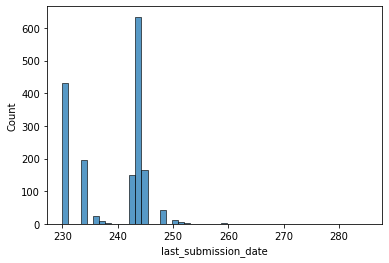

In [21]:
#Посмотрим на распределение для CCC
sns.histplot(data = exams_mean.query("code_module =='CCC'").last_submission_date, bins = 50)

In [22]:
#По графику видно, что распределение отличается от нормального
#Однако, здесь и далее проведем формальную проверку на соответствие нормальному распределению
ss.normaltest(exams_mean.query("code_module =='CCC'").last_submission_date)

NormaltestResult(statistic=9.683275690036737, pvalue=0.00789411412219717)

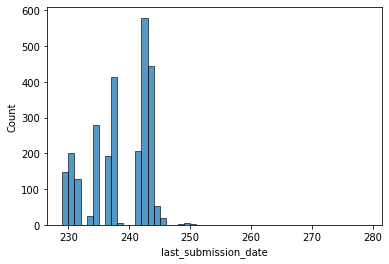

In [23]:
sns.histplot(data = exams_mean.query("code_module =='DDD'").last_submission_date, bins = 50)

In [24]:
ss.normaltest(exams_mean.query("code_module =='DDD'").last_submission_date)

NormaltestResult(statistic=46.66942887890582, pvalue=7.342809855565892e-11)

In [25]:
#Распределение отличается от нормального, что ожидаемо для такого типа данных (обычно дата сдачи экзамена регламентирована)
#Группируем по code_module, считаем медиану, а не mean и sd

median_time = exams_mean.groupby('code_module', as_index=False)\
.agg(median_days=('last_submission_date', 'median'))
median_time ['median_days'] =  median_time.median_days.round(2)
median_time

,code_module,median_days
0,CCC,244
1,DDD,237


**Ответ на вопрос 3** Медиана сдачи экзамена по предмету CCC 244 дня, по предмету DDD 237 дней.

**Вопрос 4** Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3)

In [26]:
#Воспользуемся базой registration
#Поскольку дополнительных условий нет, сгруппируем только по code_module (учитываем предметы, а не курсы)
#Одни и те же студенты могли регистрироваться на один предмет повторно в разных семестрах
#В условии не указано, что показатель популярности должен рассчитываться на основе уникальных id
#Также, полагаем, что одинаковые студенты, регистрирующиеся на предмет в разных семестрах, не искажают популярность
registrations_stat = registration.groupby('code_module', as_index = False)\
.agg(registrations = ('date_registration','count'), unregistrations = ('date_unregistration','count')).sort_values('registrations', ascending = False)
registrations_stat

,code_module,registrations,unregistrations
1,BBB,7900,2377
5,FFF,7751,2380
3,DDD,6257,2235
2,CCC,4426,1947
4,EEE,2932,718
6,GGG,2534,289
0,AAA,748,126


In [27]:
top_registrations = registrations_stat.sort_values('registrations', ascending=False).head(3)
top_unregistrations = registrations_stat.sort_values('unregistrations', ascending=False).head(3)

In [28]:
#Поскольку ответ состоит из нескольких показателей, для удобства автоматизируем вывод через f-строку во избежание ошибок переноса информации
output = f"""Топ-3 предметов по регистрациям:
{top_registrations[['code_module', 'registrations']].to_string(index=False, header=False, justify='left', line_width=None)}

Топ-3 предметов по оттоку:
{top_unregistrations[['code_module', 'unregistrations']].to_string(index=False, header=False, justify='left', line_width=None)}"""


**Ответ на вопрос 4**

In [29]:
print(output)

Топ-3 предметов по регистрациям:
 BBB  7900
 FFF  7751
 DDD  6257

Топ-3 предметов по оттоку:
 FFF  2380
 BBB  2377
 DDD  2235


**Вопрос 5** Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов. 
Из шага 2: завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

In [30]:
#Посмотрим, как отобрать нужные даты. Посмотрим на записи о семестрах
stud_courses_info.code_presentation.unique()
#Вероятно, данные и содержат записи только по нужным датам

array(['2013J', '2014J', '2013B', '2014B'], dtype=object)

In [31]:
#Нас интересуют семестры, поэтому по code_module не группируем
#Чтобы оценить завершаемость, отберем экзамены
semester_stat = stud_courses_info.query("assessment_type == 'Exam'").groupby(['code_presentation'], as_index = False)\
.agg(total_exams =('date_submitted','count'), passed_exams = ('score', lambda x: (x >= 40).sum()))
semester_stat['pass_rate'] = semester_stat.passed_exams / semester_stat.total_exams
semester_stat['pass_rate']  = semester_stat.pass_rate.round(2)
#Найдем семестр с самой низкой завершаемостью
semester_stat.sort_values('pass_rate')

,code_presentation,total_exams,passed_exams,pass_rate
0,2013B,602,504.0,0.84
3,2014J,2118,1861.0,0.88
2,2014B,1271,1149.0,0.90
1,2013J,968,878.0,0.91


In [32]:
#Найдем семестр с самой долгой сдачей курса
#Используем отфильтрованные данные exams
#группируем по семестру, предмету и студенту, чтобы для каждого студента найти наибольшую date_submitted, согласно условию
semester_mean = exams.groupby(['code_presentation', 'code_module', 'id_student'], as_index = False)\
.agg(last_submission_date=('date_submitted', 'max'))
#Удаляем колонку id_student для удобства
semester_mean = semester_mean.drop(columns = 'id_student')
semester_mean.code_presentation.unique()

array(['2013B', '2013J', '2014B', '2014J'], dtype=object)

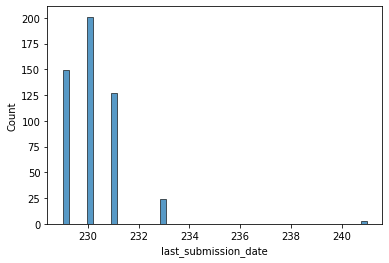

In [33]:
#Проверим, какую меру центральной тенденции будем использовать: среднее или медиану. Посмотрим на распределение
#Посмотрим на распределение для 2013B
sns.histplot(data = semester_mean.query("code_presentation =='2013B'").last_submission_date, bins = 50)

In [34]:
ss.normaltest(semester_mean.query("code_presentation =='2013B'").last_submission_date)

NormaltestResult(statistic=460.8453171249272, pvalue=8.486153455039891e-101)

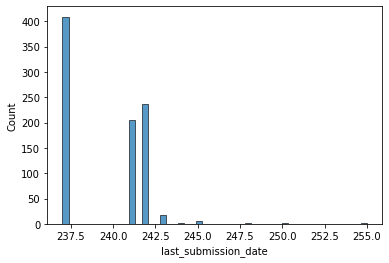

In [35]:
#Повторим для остальных семестров
sns.histplot(data = semester_mean.query("code_presentation =='2013J'").last_submission_date, bins = 50)

In [36]:
ss.normaltest(semester_mean.query("code_presentation =='2013J'").last_submission_date)

NormaltestResult(statistic=25.477741443078415, pvalue=2.9348015512399133e-06)

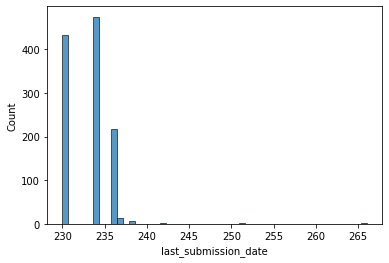

In [37]:
sns.histplot(data = semester_mean.query("code_presentation =='2014B'").last_submission_date, bins = 50)

In [38]:
ss.normaltest(semester_mean.query("code_presentation =='2014B'").last_submission_date)

NormaltestResult(statistic=598.1212122599628, pvalue=1.3171310960729486e-130)

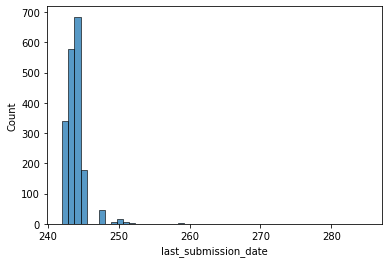

In [39]:
sns.histplot(data = semester_mean.query("code_presentation =='2014J'").last_submission_date, bins = 50)

In [40]:
ss.normaltest(semester_mean.query("code_presentation =='2014J'").last_submission_date)

NormaltestResult(statistic=2873.9359408601913, pvalue=0.0)

In [41]:
#Распределение отличается от нормального, группируем по code_presentation, считаем медиану
semester_time = semester_mean.groupby('code_presentation', as_index=False)\
.agg(median_days=('last_submission_date', 'median'))
semester_time ['median_days'] =  semester_time.median_days.round(2)
semester_time.sort_values('median_days')

,code_presentation,median_days
0,2013B,230
2,2014B,234
1,2013J,241
3,2014J,244


**Ответ на вопрос 5** Cеместр с самой низкой завершаемостью курсов (0.84) и самыми долгими средними сроками сдачи курсов (медиана 230) = 2013B

**Вопрос 6** Часто для качественного анализа аудитории используют подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Описание подхода можно найти тут: https://guillaume-martin.github.io/rfm-segmentation-with-python.html 

In [42]:
#Еще раз посмотрим на данные
stud_courses_info.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,268
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,268
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,268
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,268
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,268


In [43]:
stud_courses_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173912 entries, 0 to 173911
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id_assessment               173912 non-null  int64  
 1   id_student                  173912 non-null  int64  
 2   date_submitted              173912 non-null  int64  
 3   is_banked                   173912 non-null  int64  
 4   score                       173739 non-null  float64
 5   code_module                 173912 non-null  object 
 6   code_presentation           173912 non-null  object 
 7   assessment_type             173912 non-null  object 
 8   date                        171047 non-null  float64
 9   weight                      173912 non-null  float64
 10  module_presentation_length  173912 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 15.9+ MB


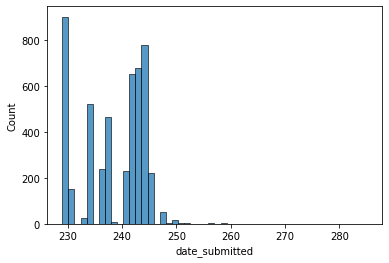

In [44]:
#Начнем с вычисления RFM
#Для вычисления метрики R - average submission time используем колонку date_submitted.
#В описании подхода указано, что обычно учитываются данные за год, однако в других источниках предлагается брать данные за 2 г.
#Поэтому используем все имеющиеся данные (2013 и 2014 гг.)
#Посмотрим на распределение date_submitted, чтобы понимать, что лучше использовать: медиану или среднее арифметическое
sns.histplot(data = stud_courses_info.query("assessment_type =='Exam'").date_submitted, bins = 50)


In [45]:
ss.normaltest(stud_courses_info.query("assessment_type =='Exam'").date_submitted)

NormaltestResult(statistic=19.662019563549663, pvalue=5.375844528191311e-05)

In [46]:
#Очевидно, что распределение отличается от нормального
#Поэтому вычислим не среднее, а медиану
rfm_df = stud_courses_info.query("assessment_type =='Exam'")\
.groupby(['id_student'], as_index = False).agg(R_avg_subm_time = ('date_submitted','median'))

In [47]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4633 entries, 0 to 4632
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_student       4633 non-null   int64  
 1   R_avg_subm_time  4633 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 108.6 KB


In [48]:
#Вычислим F - завершаемость (*завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен)

F = stud_courses_info.query("assessment_type == 'Exam'")\
.groupby(['id_student'], as_index = False)\
.agg(total_exams =('id_assessment','count'), passed_exams = ('score', lambda x: (x >= 40).sum()))
#Создадим переменную pass_rate
F['F_pass_rate'] = F.passed_exams / F.total_exams

In [49]:
rfm_df = pd.merge (rfm_df, F, on = 'id_student', how = 'left')
rfm_df.head()

,id_student,R_avg_subm_time,total_exams,passed_exams,F_pass_rate
0,23698,243.0,1,1.0,1.0
1,24213,236.0,1,1.0,1.0
2,27116,243.0,1,1.0,1.0
3,28046,237.0,1,1.0,1.0
4,28787,243.0,1,1.0,1.0


In [50]:
#Посмотрим, сколько уникальных F_pass_rate получилось
rfm_df.F_pass_rate.unique()
#Вариативность низкая, ни один студент не сдавал более двух экзаменов

array([1. , 0. , 0.5])

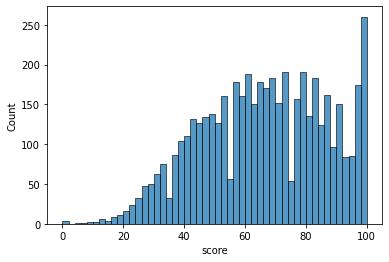

In [51]:
#Вычислим M - среднее количество баллов, получаемое за экзамен
#Начнем с проверки на соответствие нормальному распределению
sns.histplot(data = stud_courses_info.query("assessment_type =='Exam'").score, bins = 50)

In [52]:
ss.normaltest(stud_courses_info.query("assessment_type =='Exam'").score)

NormaltestResult(statistic=368.1959372467101, pvalue=1.1149826186864879e-80)

In [53]:
#Вычислим медиану
M = stud_courses_info.query("assessment_type =='Exam'")\
.groupby(['id_student'], as_index = False).agg(M_avg_score=('score', 'median'))

In [54]:
rfm_df = pd.merge (rfm_df, M, on = 'id_student', how = 'left')
rfm_df.head()

,id_student,R_avg_subm_time,total_exams,passed_exams,F_pass_rate,M_avg_score
0,23698,243.0,1,1.0,1.0,80.0
1,24213,236.0,1,1.0,1.0,58.0
2,27116,243.0,1,1.0,1.0,96.0
3,28046,237.0,1,1.0,1.0,40.0
4,28787,243.0,1,1.0,1.0,44.0


In [55]:
#Удалим лишние колонки
rfm_df = rfm_df.drop(columns = ['total_exams', 'passed_exams'])

In [56]:
#Шаг 2. Вычислим квантили
quantiles = rfm_df[['R_avg_subm_time', 'F_pass_rate', 'M_avg_score']].quantile([.2, .4, .6, .8]).to_dict()
quantiles
#Для F квантили ничего не дают, поскольку вариантивность чрезвычайно низкая.
#Каждый студент в имеющемся датасете сдавал максимум 2 экзамена.
#Поэтому чтобы не потерять информацию, присвоим F значения в трехбальной системе
#Чтобы не запутаться, приведем F к шкале от 1 до 5(0 = 1 балл, 0.5 = 3 балла, 1 балл = 5 баллов)

{'R_avg_subm_time': {0.2: 231.0, 0.4: 237.0, 0.6: 242.0, 0.8: 243.5},
 'F_pass_rate': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'M_avg_score': {0.2: 46.200000000000045, 0.4: 60.0, 0.6: 72.0, 0.8: 84.0}}

In [57]:
#Напишем функцию для присвоения рангов. Показатель Recency - реверсивный.
def r_score(x):
    if x <= quantiles['R_avg_subm_time'][.2]:
        return 5
    elif x <= quantiles['R_avg_subm_time'][.4]:
        return 4
    elif x <= quantiles['R_avg_subm_time'][.6]:
        return 3
    elif x <= quantiles['R_avg_subm_time'][.8]:
        return 2
    else:
        return 1

def f_score(x):
    if x == 1:
        return 5
    elif x == 0.5:
        return 3
    else:
        return 1   
    
def m_score(x):
    if x <= quantiles['M_avg_score'][.2]:
        return 1
    elif x <= quantiles['M_avg_score'][.4]:
        return 2
    elif x <= quantiles['M_avg_score'][.6]:
        return 3
    elif x <= quantiles['M_avg_score'][.8]:
        return 4
    else:
        return 5    

In [58]:
#Ранжируем показатели
rfm_df['R'] = rfm_df['R_avg_subm_time'].apply(lambda x: r_score(x))
rfm_df['F'] = rfm_df['F_pass_rate'].apply(lambda x: f_score(x))
rfm_df['M'] = rfm_df['M_avg_score'].apply(lambda x: m_score(x))
#Посмотрим, что получилось
rfm_df.head()

,id_student,R_avg_subm_time,F_pass_rate,M_avg_score,R,F,M
0,23698,243.0,1.0,80.0,2,5,4
1,24213,236.0,1.0,58.0,4,5,2
2,27116,243.0,1.0,96.0,2,5,5
3,28046,237.0,1.0,40.0,4,5,1
4,28787,243.0,1.0,44.0,2,5,1


In [59]:
#Соединим RFM score
rfm_df['RFM'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)
rfm_df.head()

,id_student,R_avg_subm_time,F_pass_rate,M_avg_score,R,F,M,RFM
0,23698,243.0,1.0,80.0,2,5,4,254
1,24213,236.0,1.0,58.0,4,5,2,452
2,27116,243.0,1.0,96.0,2,5,5,255
3,28046,237.0,1.0,40.0,4,5,1,451
4,28787,243.0,1.0,44.0,2,5,1,251


In [60]:
#Посмотрим, какие RFM получились
#R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов
rfm_df.RFM.value_counts()

155    266
454    250
452    241
453    239
552    234
455    218
354    210
352    209
252    182
353    180
554    167
152    162
553    160
555    152
153    151
355    147
254    134
154    134
511    133
255    128
253    127
111    117
411    113
551    108
311     93
151     86
211     80
451     75
351     65
251     44
332      8
431      6
331      5
232      3
432      2
532      2
531      1
231      1
Name: RFM, dtype: int64

In [61]:
rfm_df.RFM.nunique()

38

Сформируем кластеры. За основу взят материал из https://connectif.ai/en/blog/what-are-rfm-scores-and-how-to-calculate-them/ , адапитированный под данные. 

| Student Segment | RFM | Behavior |
| --- | --- | --- |
| Best students | 555, 554, 454, 455 | Сдают экзамены быстро, на высокий балл |
| Moderately slow learners | 355, 354 | Завершают все экзамены, но выходят на экзамены достаточно долго. Достаточно высокий балл |
| Successful with low score | 553, 551, 552, 532, 531, 452, 451, 453, 432, 353, 352, 351, 341 | Быстро выходят на экзамен. Завершают большинство курсов, но обычно имеют средние или низкие баллы |
| Fast and uneffective | 511, 411, 311 | Быстро выходят на экзамены, но сдают на низкий балл, не завершают курсы 
| Slow learners | 155, 154 | Завершают все экзамены, но выходят на экзамены очень долго. Достаточно высокий балл |
| At risk | 255, 254, 253, 252, 153, 152 | Долго выходят на экзамен, сдают все курсы, но на низкий балл |
| Low Productive | 332, 231, 251, 232, 211, 331 | Достаточно высокое время сдачи, сдают экзамены на низкий балл |
| Unsuccessful | 111, 151 | Не сдают экзамены на проходной балл, долго выходят на экзамен |

In [62]:
#Напишем функцию для присвоения названий кластеров
def clusters(row):
    RFM = row['RFM']
    if RFM in ['555', '554', '454', '455']:
        return 'Best students'
    elif RFM in ['355', '354']:
        return 'Moderately slow learners'
    elif RFM in ['553', '551', '552', '532', '531', '452', '451', '453', '432', '353', '352', '351', '341']:
        return 'Successful with low score'
    elif RFM in ['511', '411', '311']:
        return 'Fast and uneffective'
    elif RFM in ['155', '154']:
        return 'Slow learners'
    elif RFM in ['255', '254', '253', '252', '153', '152']:
        return 'At Risk'
    elif RFM in ['332', '231', '251', '232', '211', '331']:
        return 'Low Productive'
    elif RFM in ['111', '151']:
        return 'Unsuccessful'

In [63]:
rfm_df['Clusters'] = rfm_df.apply(clusters, axis=1)

In [64]:
rfm_df.head()

,id_student,R_avg_subm_time,F_pass_rate,M_avg_score,R,F,M,RFM,Clusters
0,23698,243.0,1.0,80.0,2,5,4,254,At Risk
1,24213,236.0,1.0,58.0,4,5,2,452,Successful with low score
2,27116,243.0,1.0,96.0,2,5,5,255,At Risk
3,28046,237.0,1.0,40.0,4,5,1,451,Successful with low score
4,28787,243.0,1.0,44.0,2,5,1,251,Low Productive


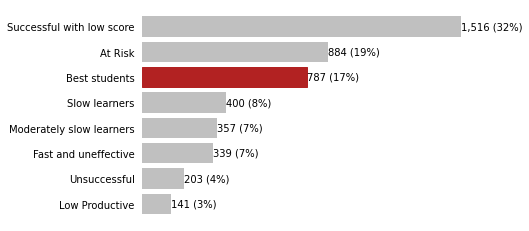

In [67]:
#Визуализируем число студентов в каждом сегменте

clusters_counts = rfm_df['Clusters'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(clusters_counts)),
              clusters_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(clusters_counts)))
ax.set_yticklabels(clusters_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if clusters_counts.index[i] == 'Best students':
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/clusters_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()


Видим, что наибольшее число студентов сдают экзамены успешно и быстро, но на средние баллы. На втором месте по численности - студенты, которые долго выходят на экзамен и сдают курсы на низкий балл, что требует внимания. Успешные студенты - на третьем месте по численности.